In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
CSV_CAPTURE_PATH = "./captures"
df = pd.read_csv(os.path.join(CSV_CAPTURE_PATH,"tctm.telemetry.MotorControlTelemetry-LeftThrottleRamp.csv"))
df["AverageSpeed"] = (df.MeasuredSpeed1+ df.MeasuredSpeed2)/2
df.tail()

,TelemetryCycle,OnBoardTime,Throttle1,Throttle2,Tachometer1,Tachometer2,Tachometer3,Tachometer4,MeasuredSpeed1,MeasuredSpeed2,MeasuredSpeed3,MeasuredSpeed4,SetpointSpeed1,SetpointSpeed2,StatusFlags,AverageSpeed
112,258,154805,0.064516,0.0,5057,4440,854,629,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
113,259,155405,0.032258,0.0,5057,4440,854,629,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
114,260,156005,0.032258,0.0,5057,4440,854,629,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
115,261,156605,0.000000,0.0,5057,4440,854,629,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
116,262,157205,0.000000,0.0,5057,4440,854,629,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


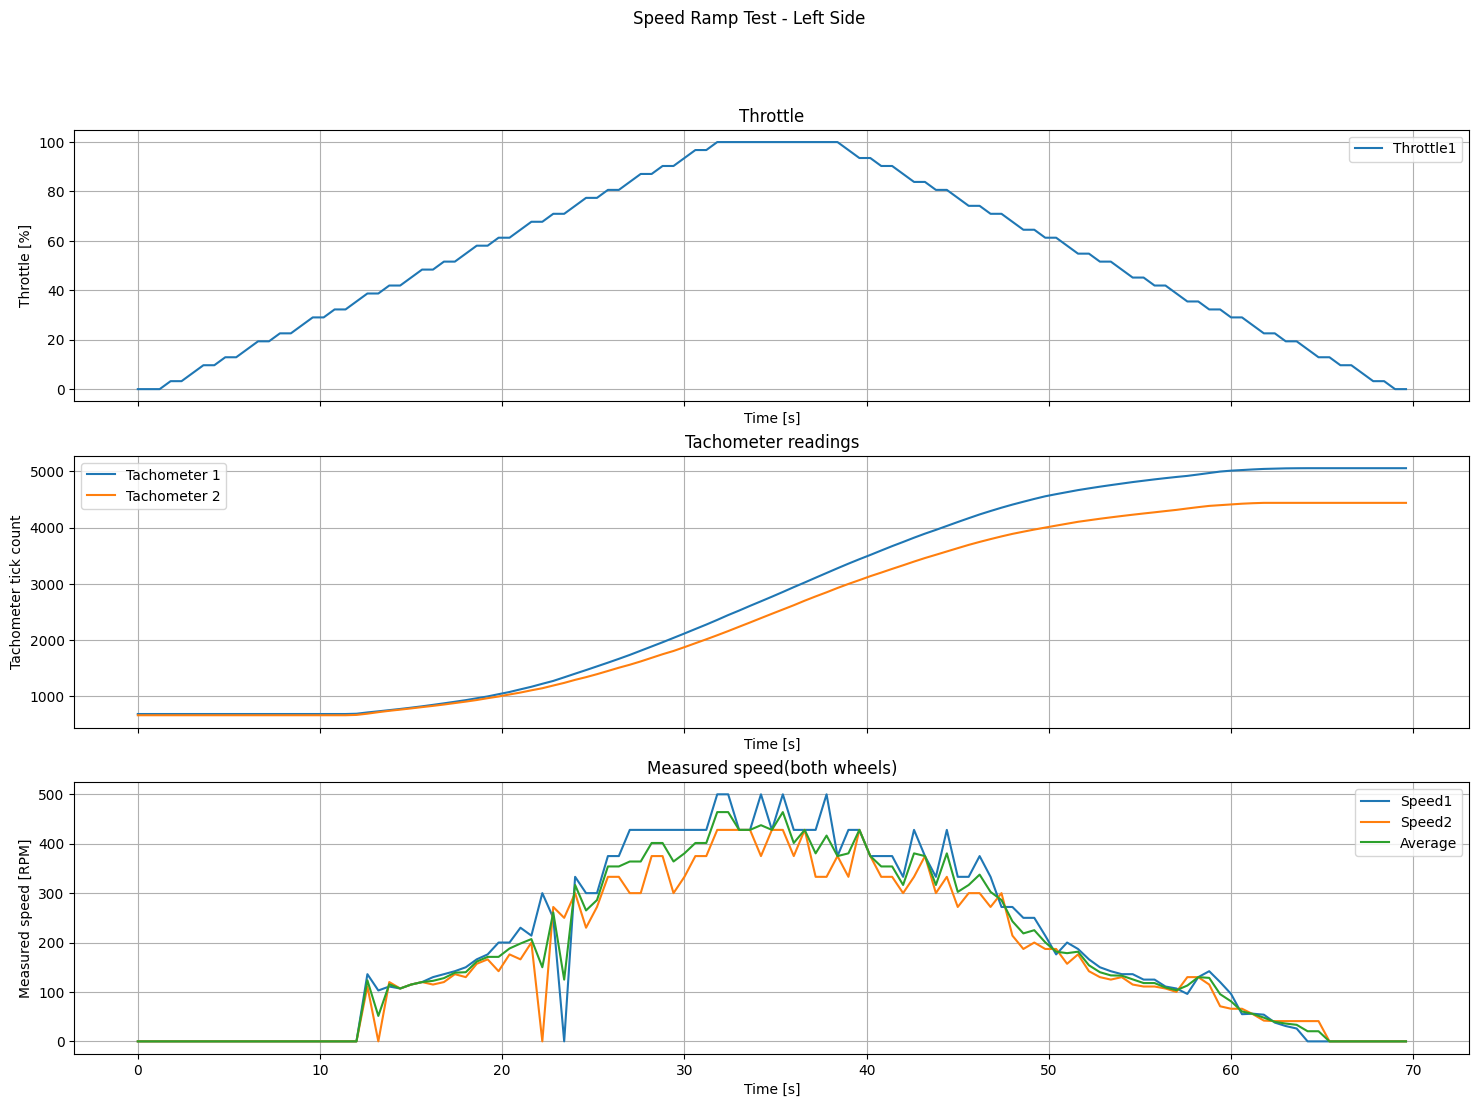

In [7]:
fig, axes = plt.subplots(3,1,figsize=(18,12),sharex=True)
t = (df.OnBoardTime-df.OnBoardTime.iloc[0])/1000
axes[0].plot(t,df.Throttle1*100)
axes[0].set_title("Throttle")
axes[0].grid(which="Both")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Throttle [%]")
axes[0].legend(["Throttle1"])

axes[1].plot(t,df.Tachometer1)
axes[1].plot(t,df.Tachometer2)
axes[1].grid(which="Both")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Tachometer tick count")
axes[1].legend(["Tachometer 1","Tachometer 2"])
axes[1].set_title("Tachometer readings");

axes[2].plot(t,df.MeasuredSpeed1)
axes[2].plot(t,df.MeasuredSpeed2)
axes[2].plot(t,df.AverageSpeed)
axes[2].set_title("Measured speed(both wheels)")
axes[2].grid(which="Both")
axes[2].set_xlabel("Time [s]")
axes[2].set_ylabel("Measured speed [RPM]")
axes[2].legend(["Speed1","Speed2","Average"])
fig.suptitle("Speed Ramp Test - Left Side");

In [5]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

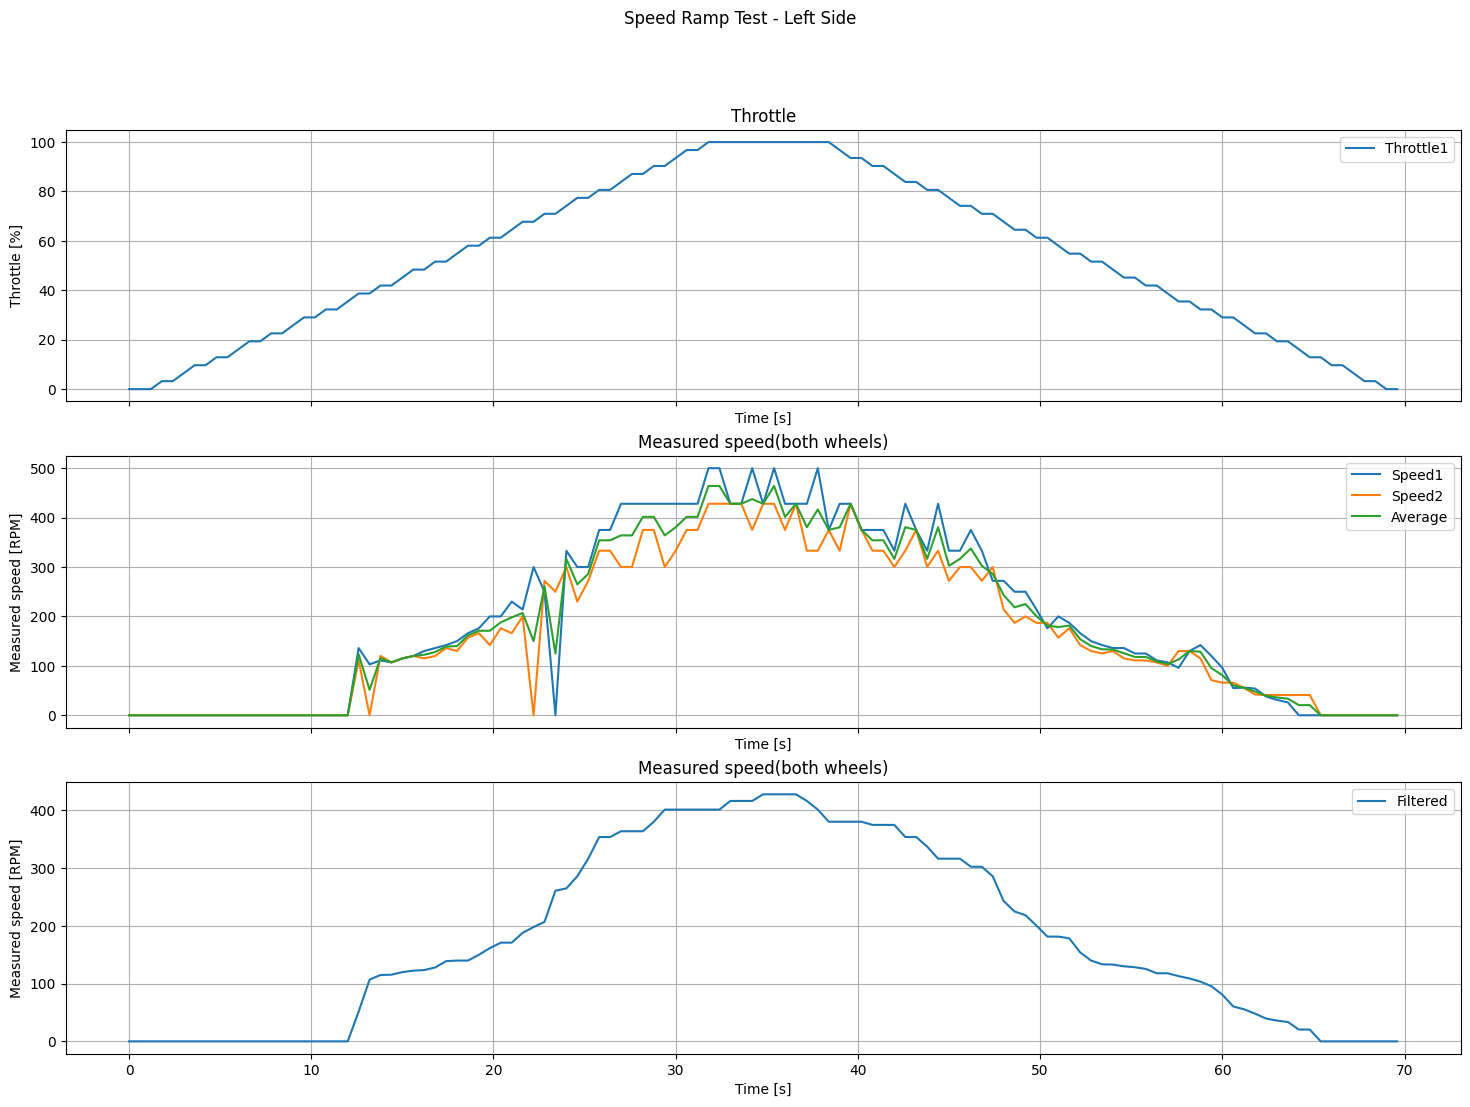

In [26]:
sos = signal.butter(0, 1, 'lowpass', fs=100, output='sos')
#filtered = signal.sosfilt(sos, df.AverageSpeed)
filtered = signal.medfilt(df.AverageSpeed, kernel_size=17)


fig, axes = plt.subplots(3,1,figsize=(18,12),sharex=True)
t = (df.OnBoardTime-df.OnBoardTime.iloc[0])/1000
axes[0].plot(t,df.Throttle1*100)
axes[0].set_title("Throttle")
axes[0].grid(which="Both")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Throttle [%]")
axes[0].legend(["Throttle1"])

axes[1].plot(t,df.MeasuredSpeed1)
axes[1].plot(t,df.MeasuredSpeed2)
axes[1].plot(t,df.AverageSpeed)
axes[1].set_title("Measured speed(both wheels)")
axes[1].grid(which="Both")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Measured speed [RPM]")
axes[1].legend(["Speed1","Speed2","Average"])

axes[2].plot(t,filtered)
axes[2].set_title("Measured speed(both wheels)")
axes[2].grid(which="Both")
axes[2].set_xlabel("Time [s]")
axes[2].set_ylabel("Measured speed [RPM]")
axes[2].legend(["Filtered"])
fig.suptitle("Speed Ramp Test - Left Side");